Access data from github

In [1]:
!git clone https://github.com/uyenlexx/data

Cloning into 'data'...
remote: Enumerating objects: 1932, done.
remote: Total 1932 (delta 0), reused 0 (delta 0), pack-reused 1932
Receiving objects: 100% (1932/1932), 173.75 MiB | 32.00 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Updating files: 100% (4071/4071), done.


In [2]:
import shutil
import os

# Define the source and destination directories
src_dir = '/content/data/wb_localization_dataset_more'
dst_dir = '/content/wb_localization_dataset'

# Copy the child directory to content
shutil.copytree(src_dir, dst_dir)

# Remove the parent directory
shutil.rmtree('/content/data')

# Install ultralytics

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# Install YOLOv8

In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


# Setup

Dataset file

In [5]:
yaml_data_content = """
train: /content/wb_localization_dataset/images/train
val: /content/wb_localization_dataset/images/val

# number of classes
nc: 1

# class names
names: ['']
"""

with open('custom_data.yaml', 'w') as f:
    f.write(yaml_data_content)

# Train model

In [ ]:
shutil.rmtree('/content/runs/detect/train2')

In [6]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/custom_data.yaml batch=3 epochs=40 imgsz=928

100% 83.7M/83.7M [00:00<00:00, 334MB/s]
Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/custom_data.yaml, epochs=40, time=None, patience=100, batch=3, imgsz=928, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

Train result:


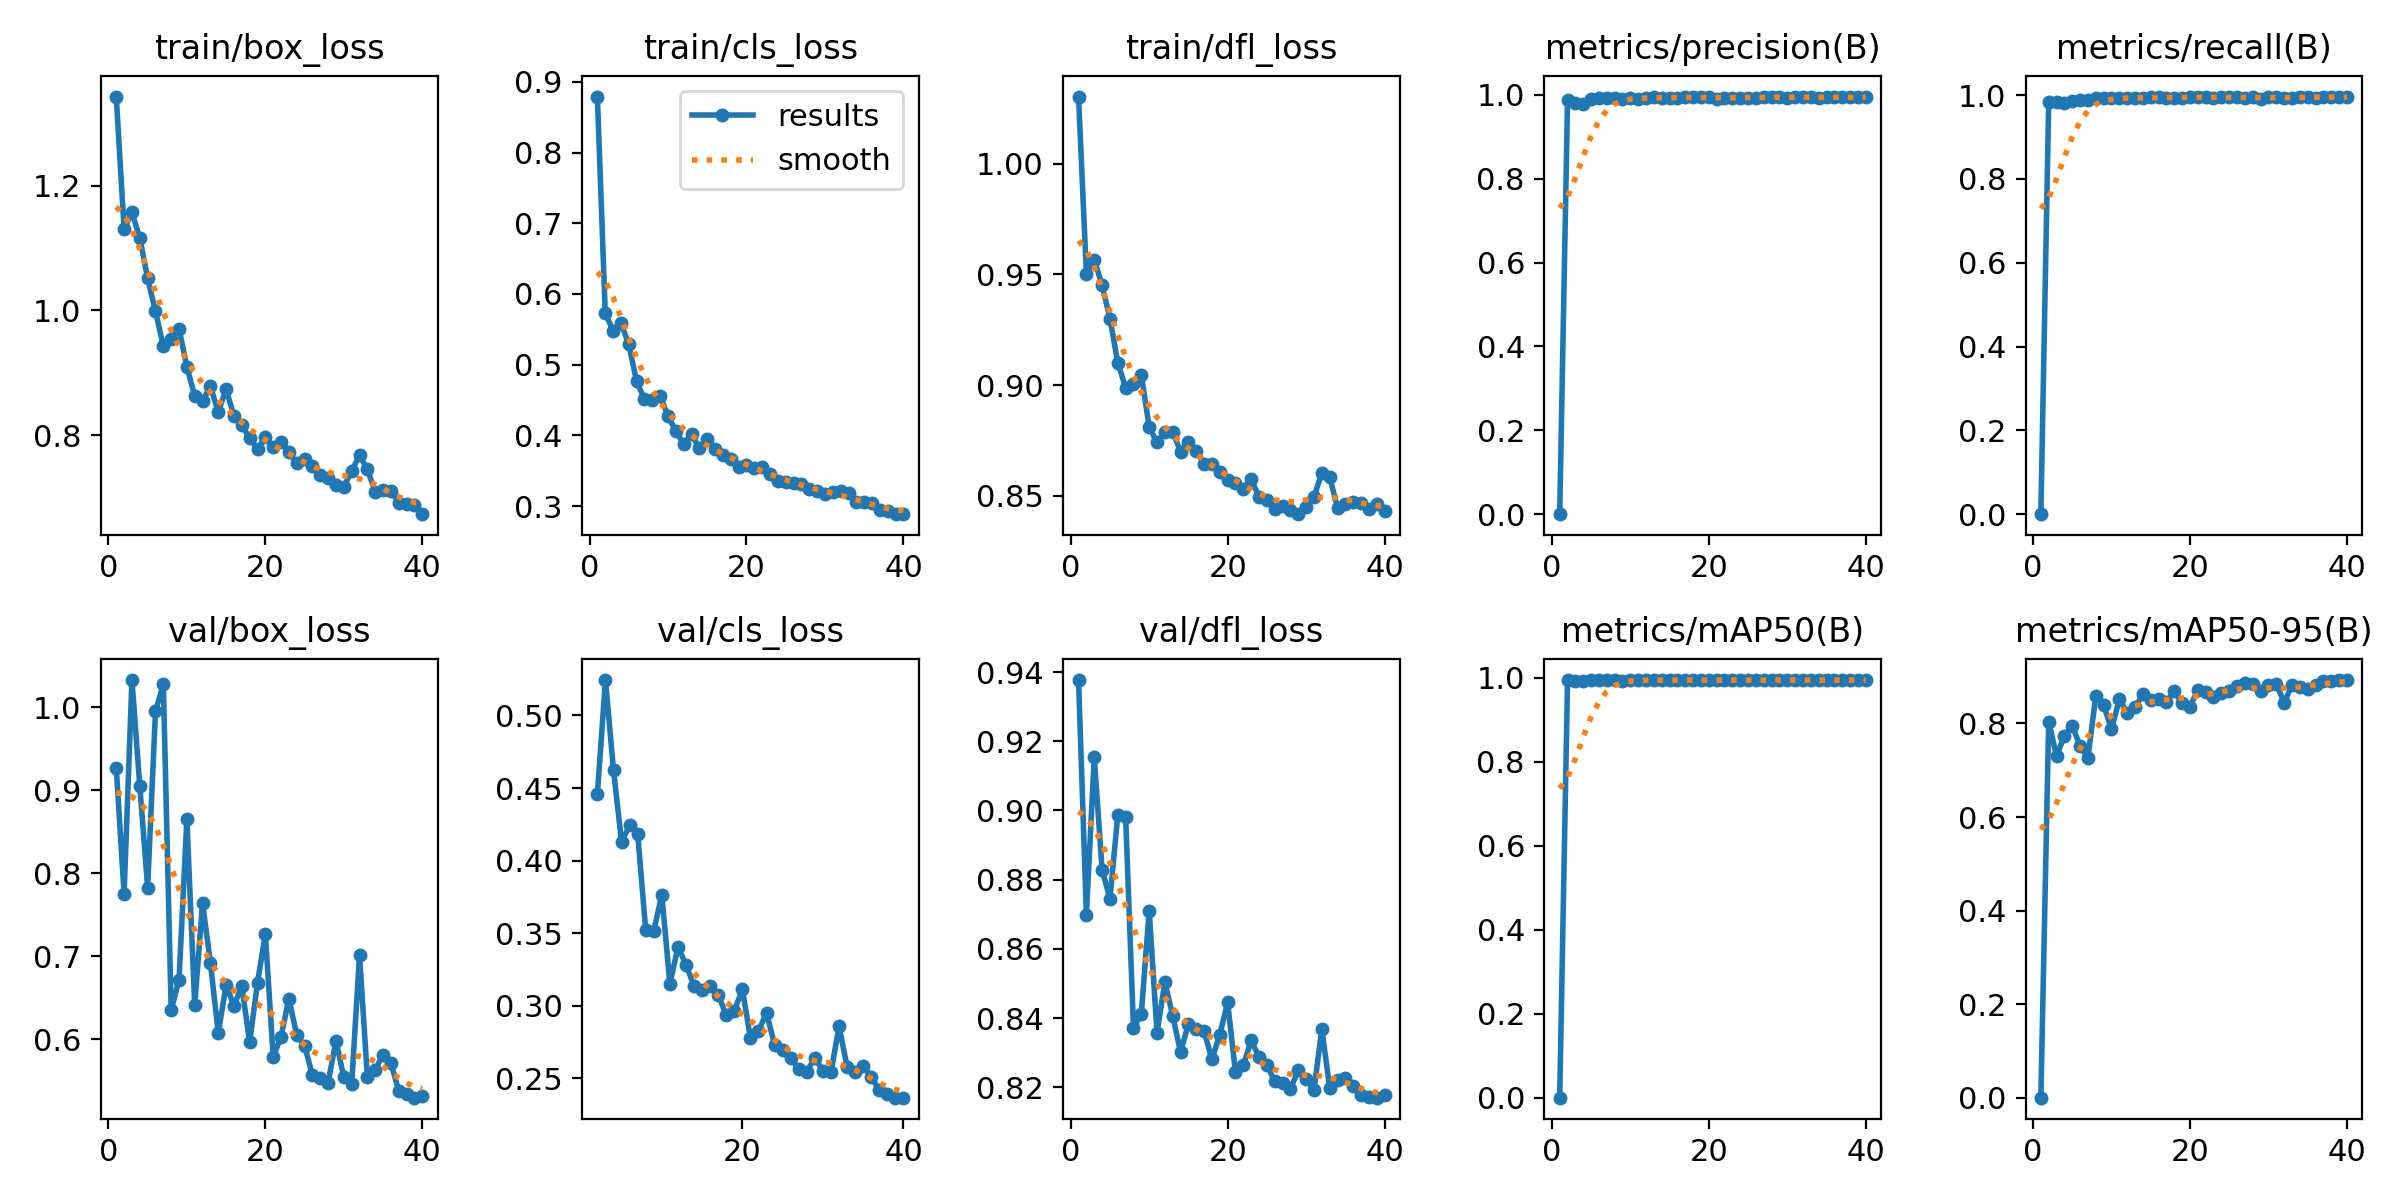

In [8]:
from IPython.display import Image as DisplayImage

print("Train result:")
DisplayImage(filename='/content/runs/detect/train/results.png', width=1280)

Train result:


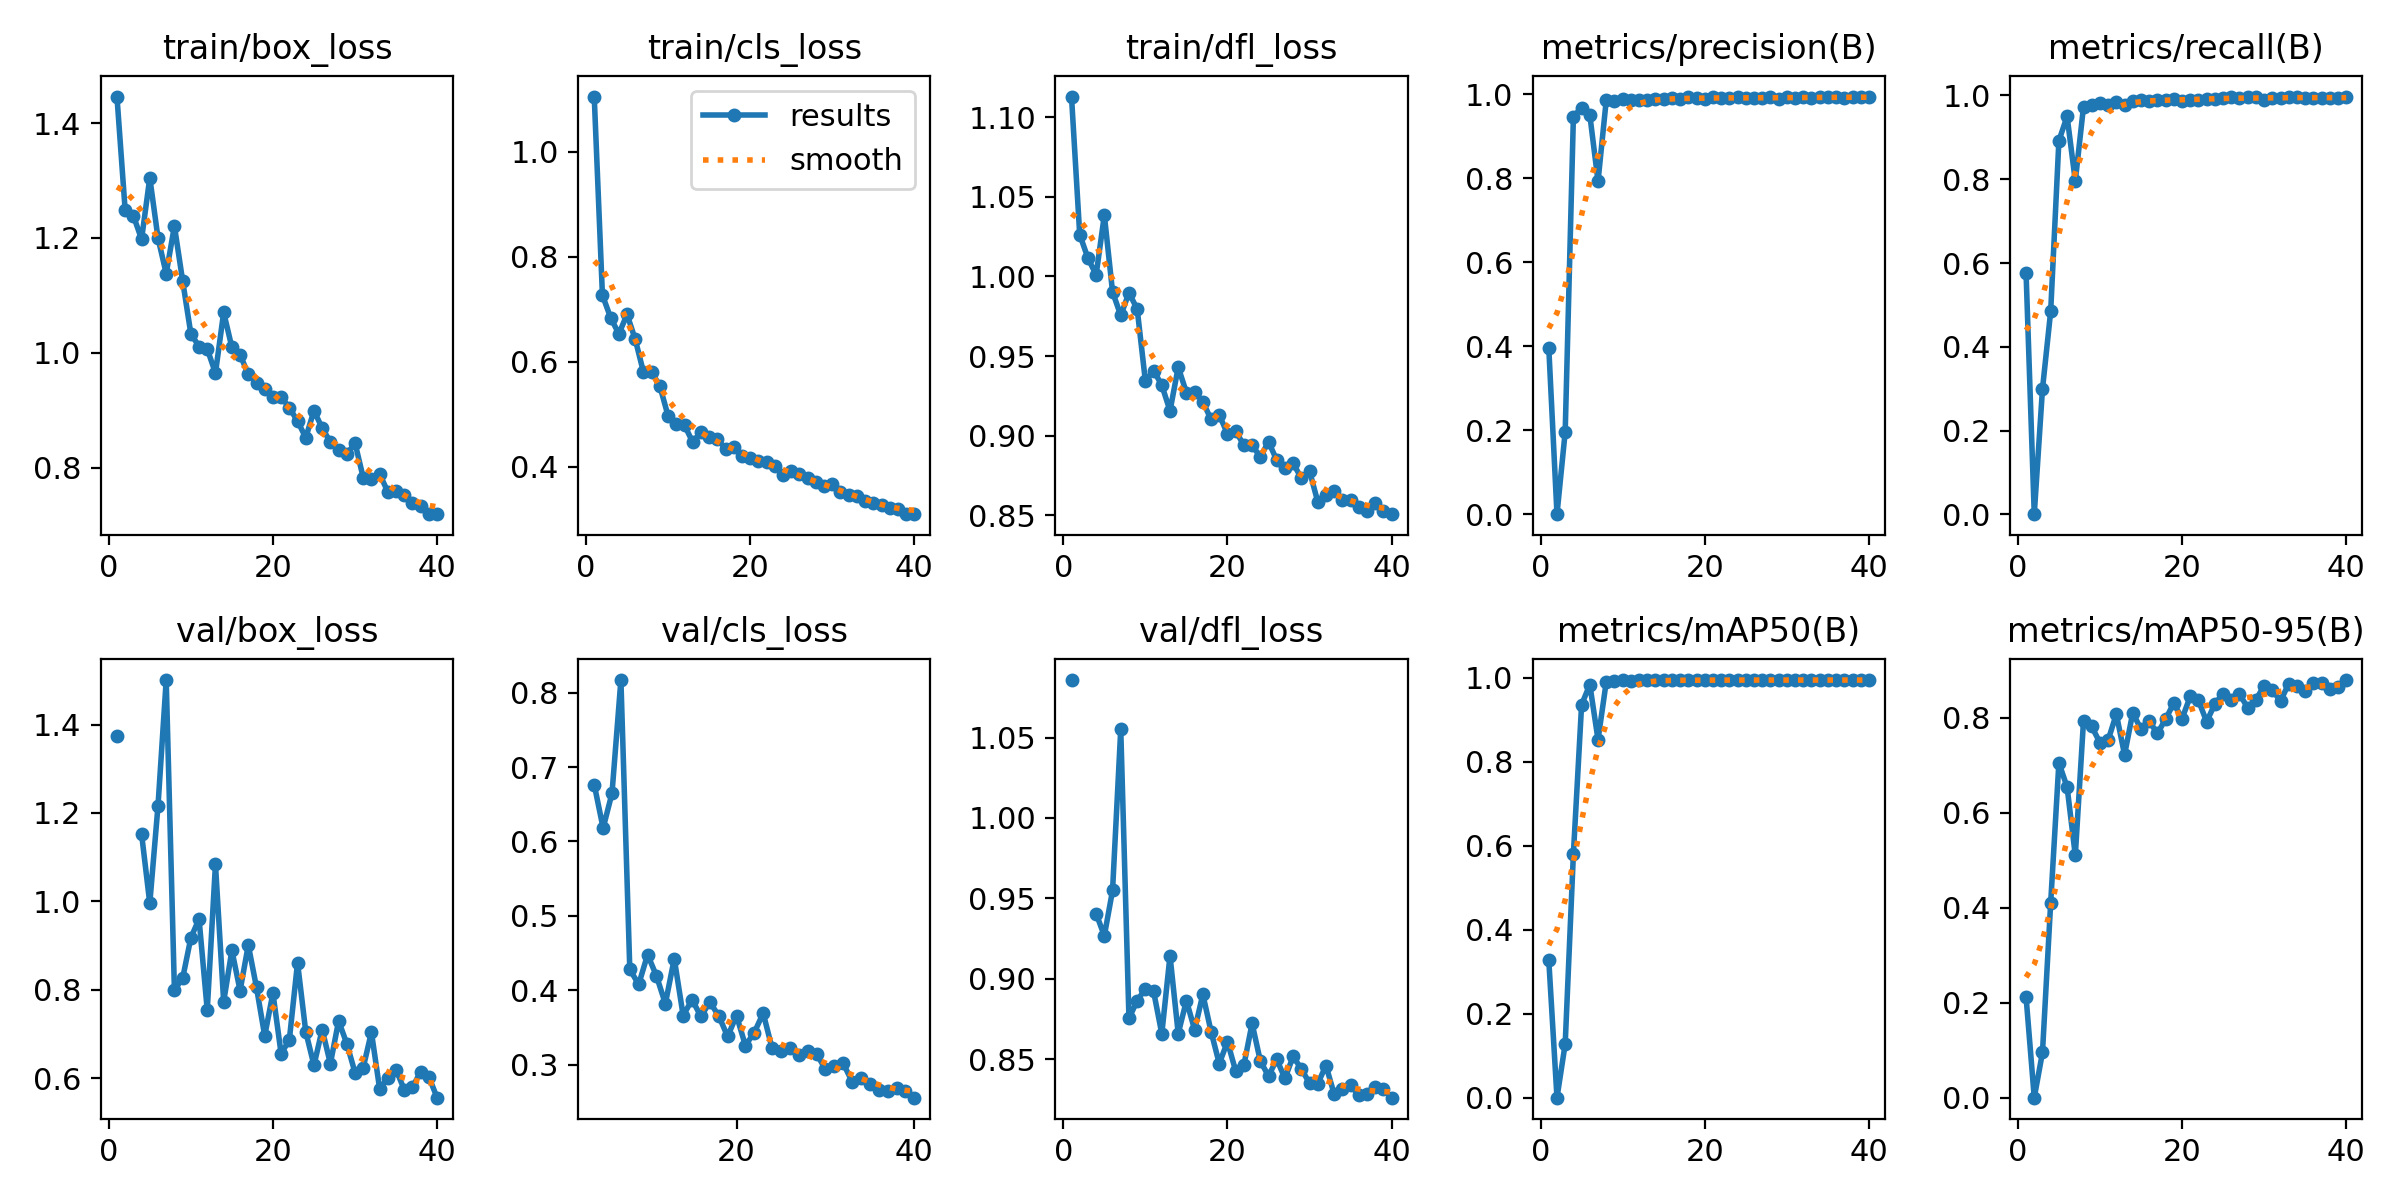

In [ ]:
from IPython.display import Image as DisplayImage

print("Train result:")
DisplayImage(filename='/content/runs/detect/train3/results.png', width=1280)

Train result:


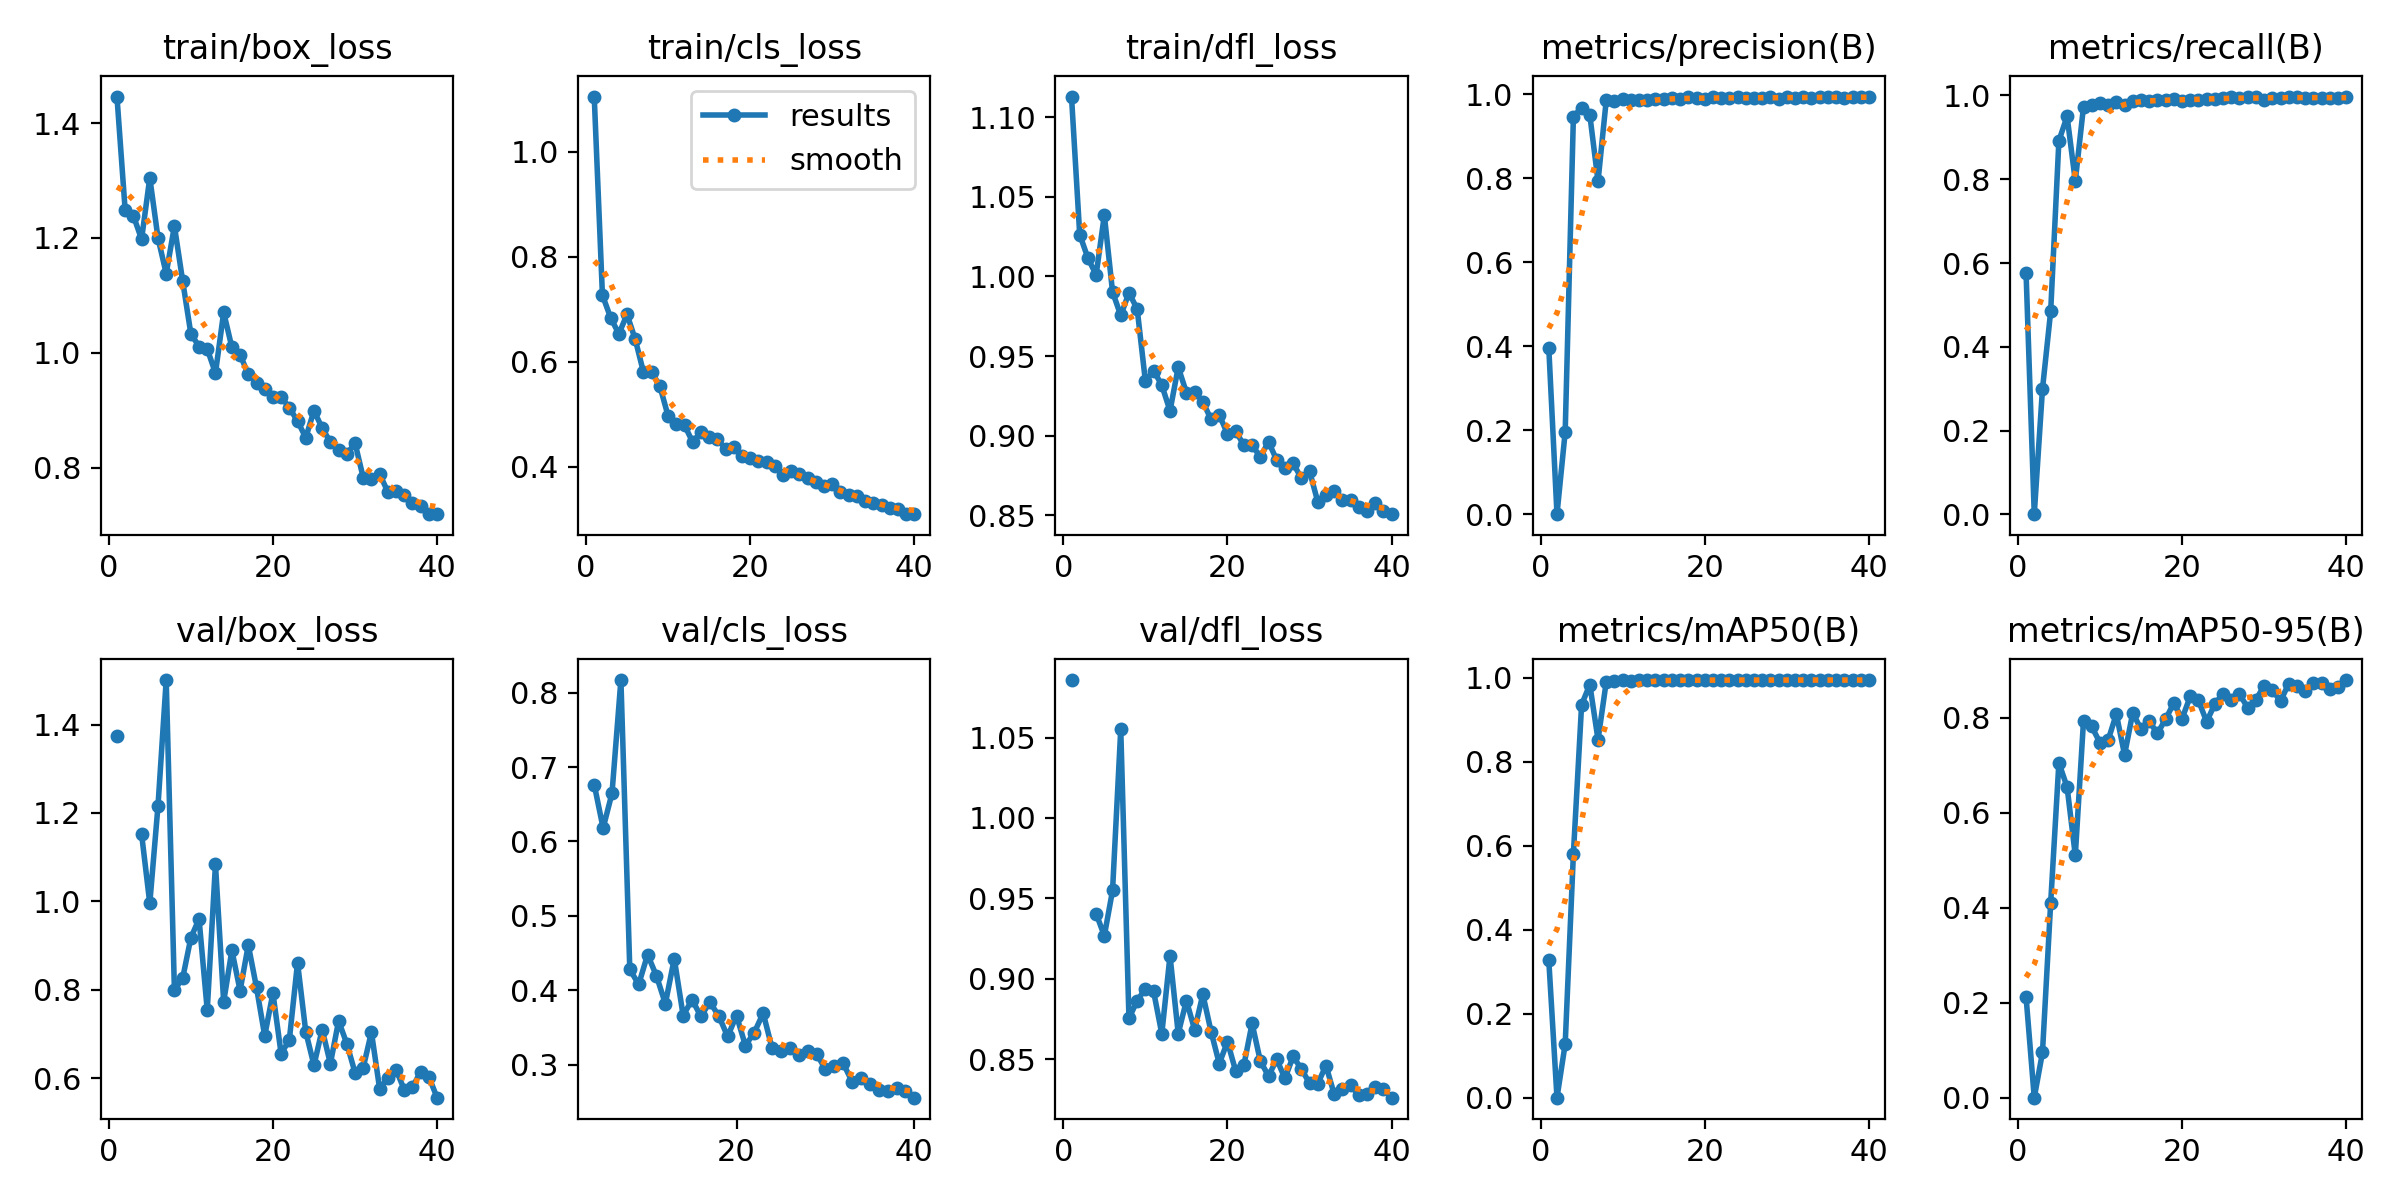

In [ ]:
print("Train result:")
DisplayImage(filename='/content/runs/detect/train3/results.png', width=1280)

# Validating model

In [9]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
#model = YOLO('/content/drive/MyDrive/ColabNotebooks/trained_model/model_v8m/runs/detect/train/weights/best.pt')

validation_result = model.val(data = '/content/custom_data.yaml',
                              task='test',
                              imgsz=640,
                              batch=8,
                              conf=0.5,
                              iou=0.5,
                              device='0',
                              )

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.89s/it]


                   all         10       1956      0.995      0.993      0.995      0.872
Speed: 9.8ms preprocess, 89.0ms inference, 0.0ms loss, 452.0ms postprocess per image
Results saved to runs/test/val


In [10]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
#model = YOLO('/content/drive/MyDrive/ColabNotebooks/trained_model/model_v8m/runs/detect/train/weights/best.pt')

validation_result = model.val(data = '/content/custom_data.yaml',
                              task='test',
                              imgsz=800,
                              batch=8,
                              conf=0.5,
                              iou=0.5,
                              device='0',
                              )

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.45s/it]


                   all         10       1956      0.996      0.995      0.995      0.891
Speed: 0.3ms preprocess, 143.5ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/test/val2


In [11]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
#model = YOLO('/content/drive/MyDrive/ColabNotebooks/trained_model/model_v8m/runs/detect/train/weights/best.pt')

validation_result = model.val(data = '/content/custom_data.yaml',
                              task='test',
                              imgsz=928,
                              batch=8,
                              conf=0.5,
                              iou=0.5,
                              device='0',
                              )

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]


                   all         10       1956      0.995      0.994      0.995        0.9
Speed: 0.9ms preprocess, 121.3ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/test/val3


# Predict

## Predict

In [14]:
!yolo task=detect mode=predict imgsz=928 conf=0.5 iou=0.5 save_txt=true save_conf=true show_labels=false show_conf=false model=/content/runs/detect/train/weights/best.pt source=/content/wb_localization_dataset/images/test

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-005.jpg: 928x608 138 s, 114.4ms
image 2/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-006.jpg: 928x608 132 s, 59.6ms
image 3/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-008.jpg: 928x608 149 s, 59.5ms
image 4/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-010.jpg: 928x608 135 s, 50.3ms
image 5/214 /content/wb_localization_dataset/images/test/nlvnpf-0059-011.jpg: 928x608 138 s, 50.9ms
image 6/214 /content/wb_localization_dataset/images/test/nlvnpf-0064-003.jpg: 928x576 174 s, 79.3ms
image 7/214 /content/wb_localization_dataset/images/test/nlvnpf-0064-005.jpg: 928x576 182 s, 48.9ms
image 8/214 /content/wb_localization_dataset/images/test/nlvnpf-0064-006.jpg: 928x576 203 s, 48.8ms
image 9/214 /content/wb_local

# Save results to Drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# change path to avoid override
!cp -r /content/runs /content/drive/MyDrive/v8Lfinal3